# (Presentation Title)
## by (Reem Ashraf Salah)

## Investigation Overview

> The main aim of this presentation to explore and visualize all dataset features in order to know what is the relation between them .

## Dataset Overview

> 
>- duration_sec ( Trip duration in seconds)
>- start Time (Time which Trip started)
>- start Station Name , ID , Latitude and Longitude
>- end Time  (Time which Trip ended)
>- end Station Name , ID , Latitude and Longitude
>- bike ID
>- user Type (Customer = 24-hour or 3-day pass user; Subscriber = Annual Member)
>- member_birth_year and gender (Zero = unknown, 1 = male, 2 = female)
>- bike_share_for_all_trip (Yes or No)

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata.csv')
def cleanAndConvertData(df) : 
    df.dropna(subset = ['start_station_id','start_station_name','end_station_id','end_station_name','member_gender','member_birth_year'], inplace = True)
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    df['member_birth_year'] = df['member_birth_year'].astype(int)
    df['age'] = 2019 - df['member_birth_year']
    df['dayOfWeek'] = df['start_time'].dt.day_name()
    df['monthOfYear'] = df['start_time'].dt.month_name()
    

In [24]:
cleanAndConvertData(df)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Age Distribution)

Almost all riders are of age from  25 to 35 years old

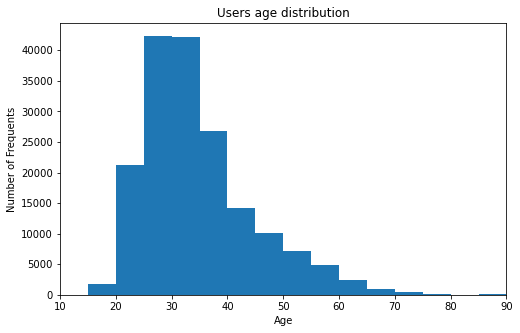

In [31]:
bins = np.arange(0, df['age'].max(), 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlim([10,90])
plt.xlabel('Age')
plt.ylabel('Number of Frequents')
plt.title('Users age distribution')
plt.show()

## (Gender )

>  Most of riders are mens as more than 50% of records are males 

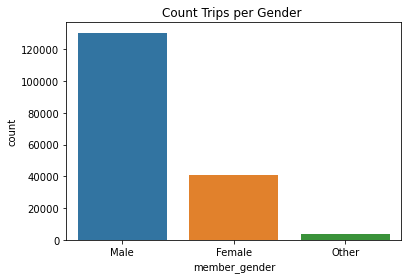

In [26]:
sb.countplot(data= df , x = 'member_gender' , order = df.member_gender.value_counts().index).set_title('Count Trips per Gender ')
plt.show()

## (UserType)

> Almost all the riders are Subscribers 90.5%

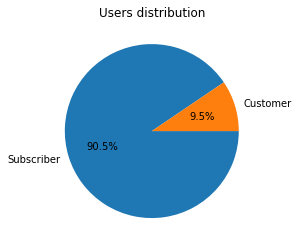

In [33]:
usertype_counts = df.user_type.value_counts()
plt.pie(usertype_counts, labels = ["Subscriber","Customer"], counterclock = False, autopct='%1.1f%%')
plt.title('Users distribution')
plt.show()

## ( Trip Duration distribution)

> Most trips takes about 1000 to 1500 seconds as average and as trip duratio decrease trip becomes more useful .

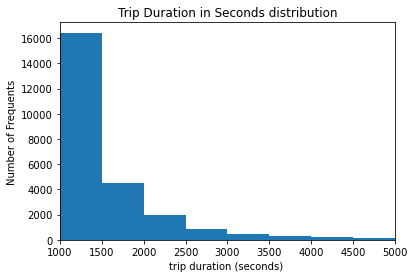

In [34]:
plt.hist(df['duration_sec'] , bins = np.arange(1000,df['duration_sec'].max()+500,500))
plt.xlim([1000,5000])
plt.xlabel('trip duration (seconds) ')
plt.ylabel('Number of Frequents')
plt.title('Trip Duration in Seconds distribution')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## (Average Trip duration per day )

> This indicate that average trip duration is the same even in weekends which have low number of trips 

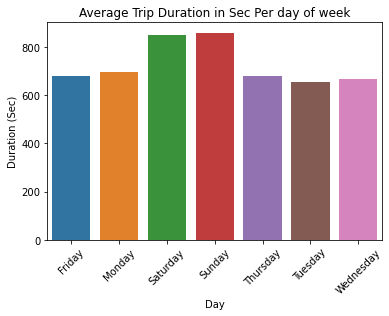

In [29]:
dayDF = df.groupby('dayOfWeek').mean()

dayDF = dayDF.reset_index()

sb.barplot(data=dayDF, x='dayOfWeek', y='duration_sec')

plt.title('Average Trip Duration in Sec Per day of week');
plt.xticks(rotation=45);    
plt.xlabel('Day');
plt.ylabel('Duration (Sec)')
plt.show()

In [38]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --TemplateExporter.exclude_input=True 

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 644902 bytes to slide_deck_template.slides.html
